In [3]:
import numpy as np              
import matplotlib.pyplot as plt
from scipy.integrate import odeint                      #in-built solver used to solve the single-stage ode
from scipy.integrate import solve_ivp
plt.rcParams['figure.dpi'] = 50

In [4]:
#parameters = [a, r, g, del_h, del_p, e_s, e_d, Sds, Ssd] 
#parameters = [0.5*(10)**(-1), 2.55, 0.001, 0.15, 0.15, 0.3, 0.2, 0.65, 0.26]
#parameters = [0.9, 2.55, 0.001, 0.15, 0.15, 0.3, 0.2, 0.65, 0.26]
def Phi(L, parameters, H_s, H_d, P):                           #defining the parasitism rate function Phi
    a = parameters[0]
    g = parameters[2]
    Sds = parameters[7]
    Ssd = parameters[8]
    if L == 's':
        return (a*H_s)*(H_s+Sds*H_d)/((H_s+H_d)*(1+a*g*(H_s+Sds*H_d)))
    else:
        return (a*H_d)*(Ssd*H_s+H_d)/((H_s+H_d)*(1+a*g*(Ssd*H_s+H_d)))
    
def system(F, t):
    H_s, H_d, P = F   
    parameters = [1.75, 2.55, 0.001, 0.15, 0.15, 0.3, 0.2, 0.65, 1]     #Parameters are defined her
    a = parameters[0]                               
    r = parameters[1]
    g = parameters[2]
    del_h = parameters[3]
    del_p = parameters[4]
    e_s = parameters[5]
    e_d = parameters[6]
    Sds = parameters[7]
    Ssd = parameters[8]
    dH_s = r*H_s*(1-del_h/r-(H_s+H_d))-e_s*Phi('s', parameters, H_s, H_d, P)*P  #Equatings for H_s
    dH_d = r*H_d*(1-del_h/r-(H_s+H_d))-e_d*Phi('d', parameters, H_s, H_d, P)*P  #Equation for H_d
    dP = P*(e_s*Phi('s', parameters, H_s, H_d, P)+e_d*Phi('d', parameters, H_s, H_d, P))-del_p*P   #Equation for P
    return [dH_s, dH_d, dP]

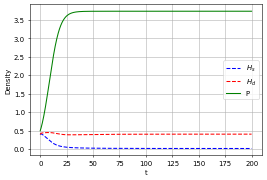

In [5]:
t = np.linspace(0, 200, 1000)              #Time step of dt = 0.02 in the interval (0,200)
x0 = [0.4, 0.4, 0.5]                       #Initial condition is defined here [H_s, H_d, P]
sol = odeint(system, x0, t)                #Calling the odeint solver to solve the above system of single-stage model

plt.plot(t, sol[:, 0], 'b--', label='$H_s$')  #We plot the immidiate results
plt.plot(t, sol[:, 1], 'r--', label='$H_d$')
plt.plot(t, sol[:, 2], 'g', label='P')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('Density')
plt.grid()
plt.show()